In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [99]:
import json
from utils import AttrDict
from pathlib import Path
from dataset import *

h = AttrDict(json.loads(Path('./configs/scotus/hubert500_lut.json').read_text()))

device = torch.device('cuda:0')
embedder = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb")#.to(device)
training_filelist, validation_filelist = get_dataset_filelist(h)
trainset = CodeDataset(training_filelist, h.segment_size, h.code_hop_size, h.n_fft, h.num_mels, h.hop_size,
                        h.win_size, h.sampling_rate, h.fmin, h.fmax, n_cache_reuse=0, fmax_loss=h.fmax_for_loss,
                        device=device, f0=h.get('f0', None), multispkr=h.get('multispkr', None), embedder=embedder,
                        f0_stats=h.get('f0_stats', None),
                        f0_normalize=h.get('f0_normalize', False), f0_feats=h.get('f0_feats', False),
                        f0_median=h.get('f0_median', False), f0_interp=h.get('f0_interp', False),
                        vqvae=h.get('code_vq_params', False))

In [100]:
metadata = {"audio": "/home/sterlind/projects/tima3/scotus/datasets/scotus_flacs/1970.420-t01.361.1-112-2.flac", "hubert": "9 355 9 47 47 442 442 442 477 330 447 447 82 82 274 274 290 72 72 138 212 212 479 464 109 109 299 174 420 489 489 182 182 182 413 413 413 155 155 174 47 47 47 13 74 399 446 446 271 338 112 112 388 388 388 383 162 162 350 72 138 138 378 179 228 53 437 160 336 336 34 34 415 415 267 267 267 477 29 139 489 263 263 263 464 28 64 263 263 263 263 464 28 64 286 263 402 402 402 464 264 476 476 272 359 237 124 284 103 426 426 212 212 14 77 131 158 240 458 194 448 448 421 416 416 83 347 200 200 200 17 143 143 143 74 423 423 423 78 131 131 131 131 135 135 240 458 110 110 110 267 267 370 77 282 158 393 393 440 440 347 347 200 268 219 219 52 50 264 133 364 180 287 287 216 216 40 430 430 430 88 196 155 155 119 119 292 292 171 54 54 54 54 51 208 208 208 156 156 73 73 78 78 78 78 8 8 8 8 8 8 31 135 161 161 442 425 332 445 445 355 310 310 161 161 47 442 442 369 369 193 193 283 283 277 277 94 94 391 314 314 189 189 189 197 53 457 437 160 336 355 34 34 34 361 361 361 3 3 3 431 95 95 185 185 43 43 43 152 316 37 37 37 37 165 450 237 124 124 245 245 389 389 177 177 285 285 3 407 341 341 474 265 179 179 228 228 53 457 395 395 99 141 308 308 308 308 308 17 17 17 17 17 353 353 52 376 464 36 132 414 30 135 240 458 194 358 358 358 267 358 211 211 174 174 167 167 169 162 3 3 489 182 182 182 413 413 413 413 155 418 197 53 457 437 437 278 336 336 49 110 491 491 491 491 403 403 403 391 314 470 407 341 341 174 474 61 14 477 330 447 415 82 274 274 328 330 152 152 187 463 463 334 409 295 284 284 50 28 28 64 152 250 250 78 345 221 193 193 283 283 290 290 211 174 161 47 167 82 82 82 193 213 112 162 442 473 473 421 495 42 222 334 295 284 316 184 335 132 152 179 197 53 53 457 457 395 395 99 141 200 308 308 308 308 353 353 52 71 464 264 414 271 240 458 194 110 358 267 58 489 489 147 147 147 464 357 43 152 187 187 463 312 409 13 388 383 356 183 183 180 180 11 116 116 228 180 180 180 11 11 276 276 416 416 416 416 83 83 347 347 347 143 13 21 383 383 281 281 281 281 86 183 4 136 136 35 100 309 114 224 224 224 76 289 289 289 289 494 343 372 126 126 236 355 303 45 50 109 174 118 249 249 446 42 42 42 222 312 181 7 7 7 87 87 435 439 439 421 397 397 397 441 357 357 307 314 189 189 197 287 298 460 460 201 271 232 312 220 220 163 477 29 489 489 329 329 329 95 147 147 147 122 464 64 254 193 193 283 283 205 219 219 219 219 230 230 431 431 122 122 154 266 132 132 422 131 271 114 224 224 224 113 113 113 493 394 158 306 194 194 14 446 158 412 412 110 110 491 267 267 370 211 161 47 47 171 275 275 275 332 73 199 131 131 131 131 307 314 419 419 313 262 262 2 186 411 444 444 444 174 118 249 187 463 222 312 404 449 449 449 413 248 317 29 152 152 211 72 409 409 13 388 383 339 339 2 235 324 302 302 77 271 338 65 354 112 388 388 383 245 245 389 389 177 269 269 269 397 28 64 360 332 262 2 364 457 457 457 395 395 99 141 141 140 140 140 275 431 438 381 381 297 204 204 89 177 285 285 285 220 220 477 330 265 448 448 108 107 131 158 338 65 354 354 484", "duration": 15.544}

In [159]:
import soundfile
from dataset2 import AudioSampler, AudioSamplerConfig
embedder = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb")
conf = AudioSamplerConfig(
    code_sample_freq=50,
    segment_size=8960,
    sampling_rate=16_000,
    fmin=0,
    fmax=8000,
    n_fft=1024,
    n_mels=80,
    hop_size=256,
    win_size=1024
)
sampler = AudioSampler(conf, embedder)
wav, sr = soundfile.read(metadata['audio'])
wav = torch.tensor(wav)
codes = torch.tensor([int(c) for c in metadata['hubert'].split(' ')], dtype=torch.int32)

In [160]:
f0s, audios, mels, seg_codes, embeds = sampler.process(wav, codes)

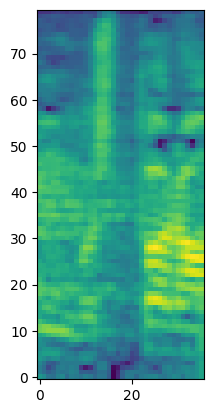

In [152]:
import matplotlib.pyplot as plt
plt.imshow(mels[36], origin='lower')

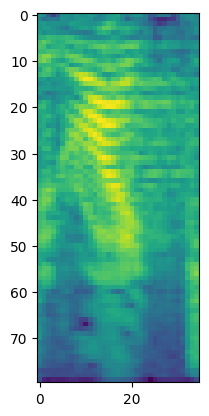

In [148]:
plt.imshow(out[-1])

In [134]:
from dataset2 import dynamic_range_compression
dynamic_range_compression(mels[4]).max()

tensor(6.7561)

In [130]:
out[-1].max()

tensor(0.4053)

In [88]:
x = torch.randint(0, 64, (16,))
print(x)
idxs = torch.tensor([1, 4, 3, 9], dtype=torch.int64)
print(idxs)
idxs2 = idxs[:, None].expand(-1, 2) + torch.arange(2)
print(idxs2)
x[idxs2]

tensor([ 9, 10, 14, 33, 25,  8,  8, 30, 17, 54, 21, 54, 26, 56,  0, 45])
tensor([1, 4, 3, 9])
tensor([[ 1,  2],
        [ 4,  5],
        [ 3,  4],
        [ 9, 10]])


tensor([[10, 14],
        [25,  8],
        [33, 25],
        [54, 21]])

In [47]:
conf.segment_size//sampler.chirp_len

28

In [33]:
wav

tensor([-0.0006, -0.0004,  0.0013,  ...,  0.0497,  0.0786,  0.0410],
       dtype=torch.float64)

In [29]:
h.win_size

1024

In [101]:
i = iter(trainset)
next(i)
out = next(i)

/home/sterlind/miniconda3/envs/tima2/lib/python3.10/site-packages/scipy/signal/_signaltools.py:1563: UserWarning: kernel_size exceeds volume extent: the volume will be zero-padded.
  warnings.warn('kernel_size exceeds volume extent: the volume will be '


In [104]:
out[-1].shape

torch.Size([80, 35])

In [12]:
out

({'code': array([194, 448, 448, 421, 416, 416,  83, 347, 200, 200, 200,  17, 143,
         143, 143,  74, 423, 423, 423,  78, 131, 131, 131, 131, 135, 135,
         240, 458]),
  'f0': array([[ 0.        ,  0.        ,  0.        , -0.26102084, -0.30889362,
          -0.30889362, -0.30889362, -0.35528207, -0.37794104, -0.4222289 ,
          -0.4222289 , -0.44387338, -0.46519476, -0.506897  , -0.506897  ,
          -0.506897  , -0.506897  , -0.506897  , -0.506897  , -0.69826996,
          -0.506897  , -0.4222289 , -0.4222289 , -0.37794104, -0.33226904,
          -0.33226904, -0.33226904, -0.33226904, -0.26102084, -0.23650536,
          -0.23650536, -0.18626873, -0.13435753, -0.10774744, -0.08068655,
          -0.0531629 , -0.0531629 , -0.02516488,  0.00332019,  0.00332019,
           0.09182742,  0.12239295,  0.15351403,  0.18520622,  0.25036812,
           0.25036812,  0.2838708 ,  0.2838708 ,  0.318012  ,  0.318012  ,
           0.318012  ,  0.318012  ,  0.318012  ,  0.318012  ,  0.31

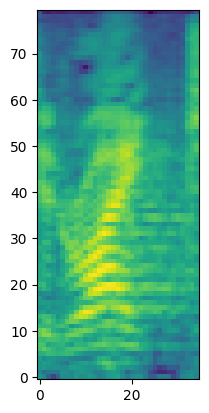

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.switch_backend('module://matplotlib_inline.backend_inline')
plt.imshow(out[-1].cpu().numpy(), origin='lower')
plt.show()

module://matplotlib_inline.backend_inline


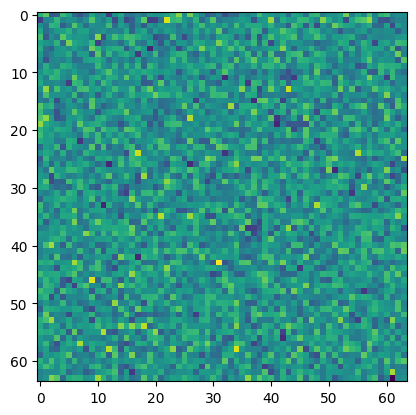

In [2]:
import torch
import matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('module://matplotlib_inline.backend_inline')
print(plt.get_backend())
plt.imshow(torch.randn(64, 64).numpy())